<a href="https://colab.research.google.com/github/Aaditya97735/Aaditya97735/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('netflix_titles.csv')


Saving netflix_titles.csv to netflix_titles (1).csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<ipython-input-5-6449a976ace1>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
<ipython-input-5-6449a976ace1>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

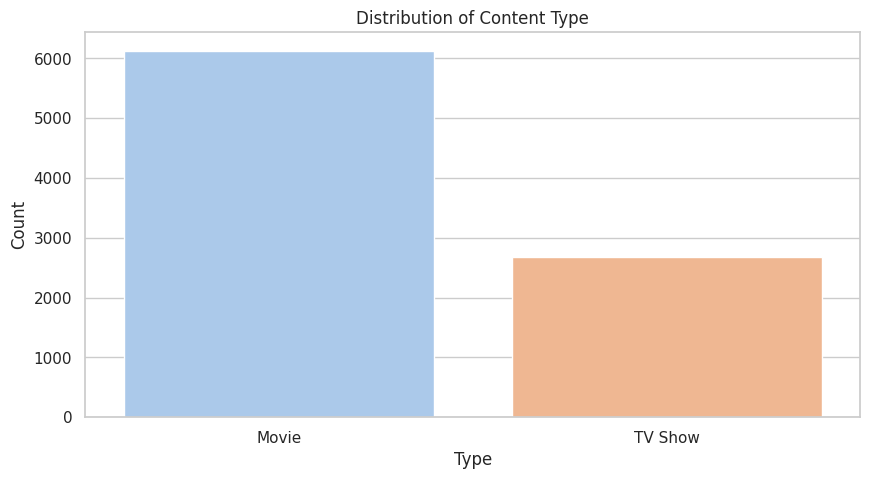

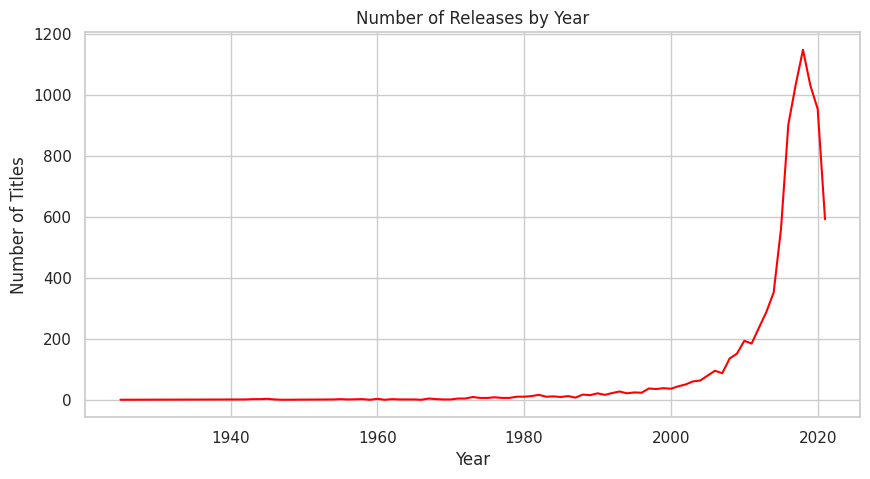

<ipython-input-5-6449a976ace1>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')


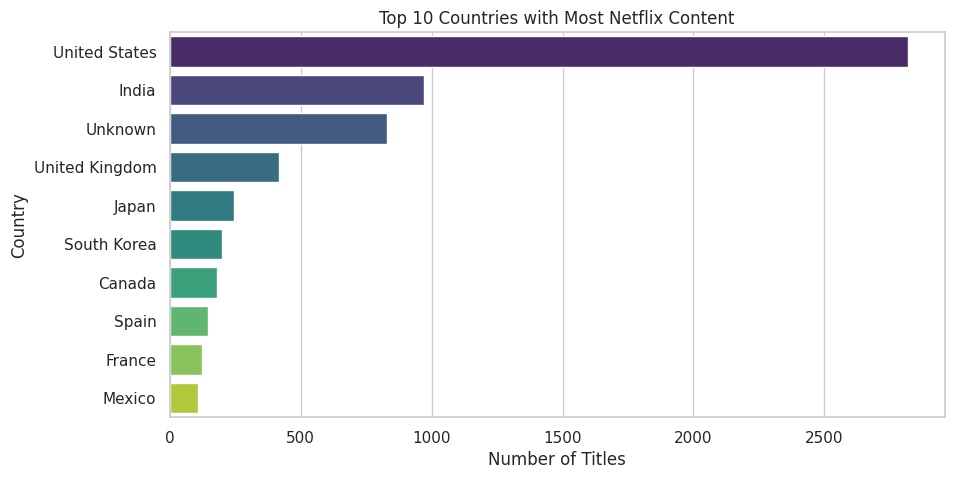

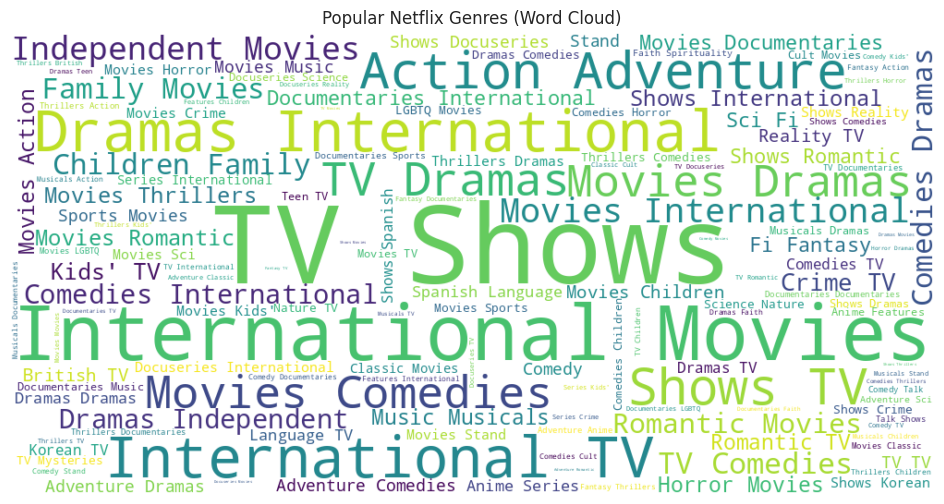

<ipython-input-5-6449a976ace1>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration_minutes'] = movie_df['duration'].str.replace(' min', '', regex=False)
<ipython-input-5-6449a976ace1>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration_minutes'] = pd.to_numeric(movie_df['duration_minutes'], errors='coerce')


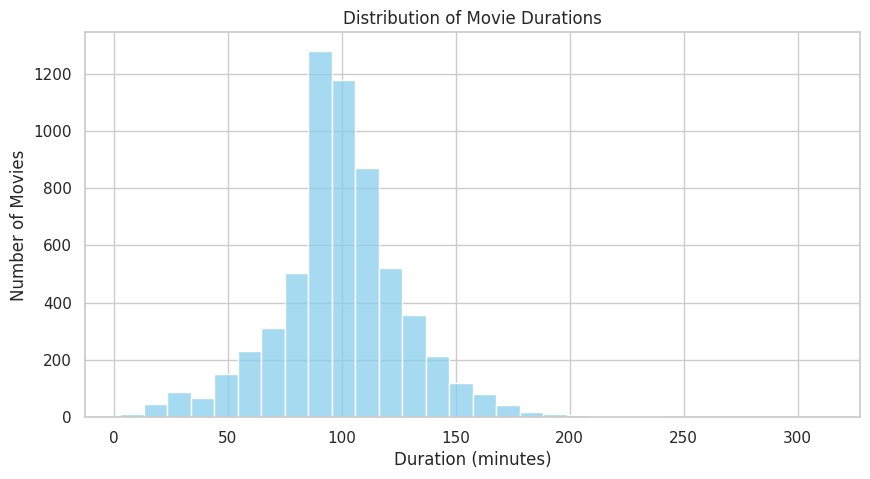

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

df = pd.read_csv("netflix_titles.csv")

df.info()
df.head()

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)

sns.countplot(data=df, x='type', palette='pastel')
plt.title("Distribution of Content Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

df['release_year'].value_counts().sort_index().plot(kind='line', color='red')
plt.title("Number of Releases by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

text = ' '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular Netflix Genres (Word Cloud)")
plt.show()

movie_df = df[df['type'] == 'Movie']
movie_df['duration_minutes'] = movie_df['duration'].str.replace(' min', '', regex=False)
movie_df['duration_minutes'] = pd.to_numeric(movie_df['duration_minutes'], errors='coerce')

sns.histplot(movie_df['duration_minutes'].dropna(), bins=30, color='skyblue')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()


Text(0.5, 1.0, 'Monthly Content Added on Netflix')

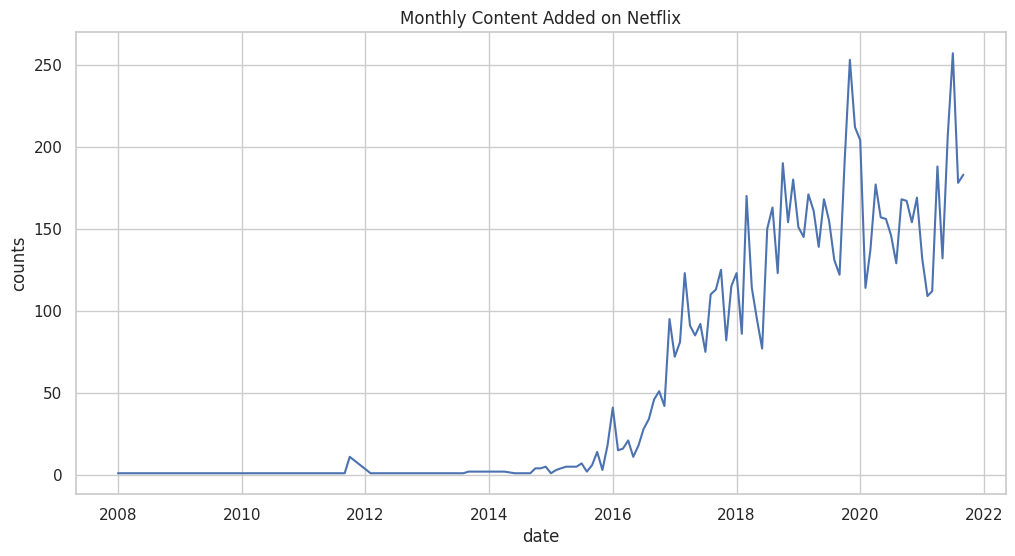

In [ ]:
monthly_adds = df.groupby(['year_added', 'month_added']).size().reset_index(name='counts')
monthly_adds['date'] = pd.to_datetime(dict(year=monthly_adds.year_added, month=monthly_adds.month_added, day=1))

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_adds, x='date', y='counts')
plt.title("Monthly Content Added on Netflix")


<Axes: title={'center': 'Top Genres in India'}, ylabel='listed_in'>

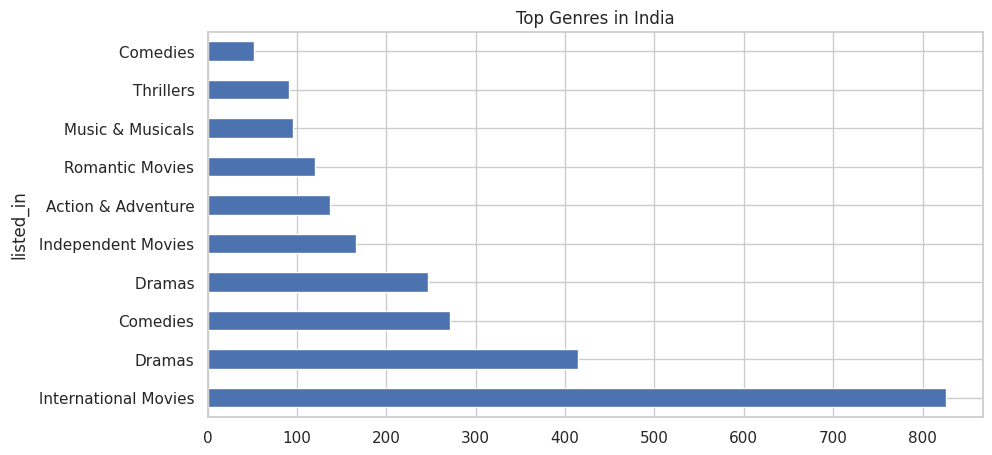

In [ ]:
india_genres = df[df['country'].str.contains('India')]['listed_in'].str.split(',').explode()
india_genres.value_counts().head(10).plot(kind='barh', title='Top Genres in India')


<Axes: title={'center': 'Top 10 Netflix Actors'}, ylabel='cast'>

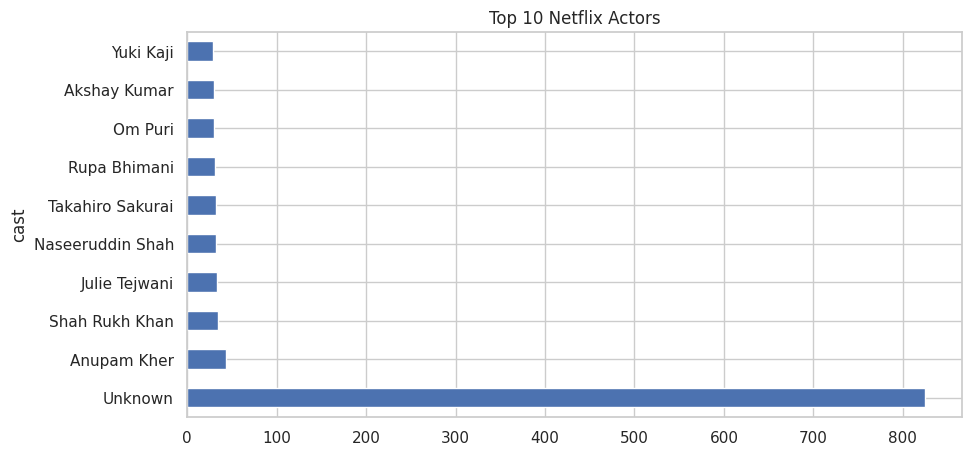

In [ ]:
actors = df['cast'].dropna().str.split(',').explode().str.strip()
top_actors = actors.value_counts().head(10)
top_actors.plot(kind='barh', title='Top 10 Netflix Actors')


<ipython-input-9-b6a13094b07c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)


<Axes: title={'center': 'Number of Seasons in TV Shows'}, ylabel='Frequency'>

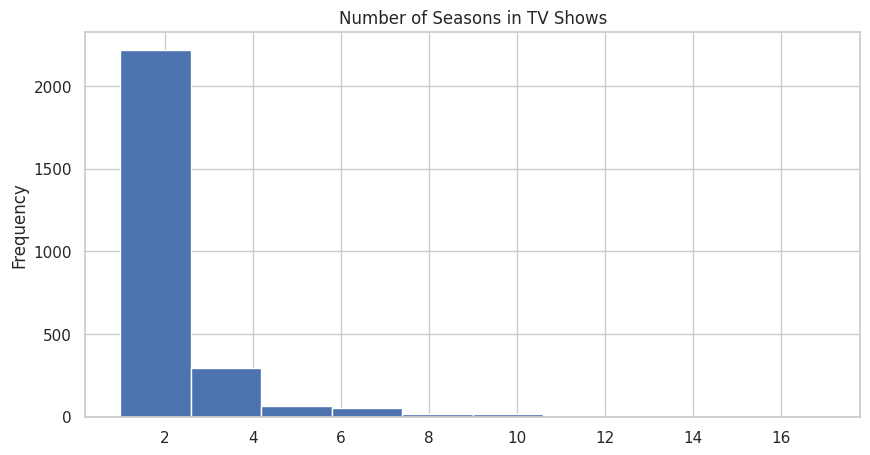

In [ ]:
tv_df = df[df['type'] == 'TV Show']
tv_df['seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)
tv_df['seasons'].plot(kind='hist', bins=10, title='Number of Seasons in TV Shows')
